In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
import math


#Load the data
url = "https://raw.githubusercontent.com/ErkCurley/Eric_ML/master/Assignment%203/FlightDelays.csv"
data = pd.read_csv(url)
data = data.drop(["TAIL_NUM","DISTANCE","Weather","FL_NUM","DISTANCE","FL_DATE","DAY_OF_MONTH","DEP_TIME"],axis='columns')

data.CRS_DEP_TIME = data.CRS_DEP_TIME / 100
data['CRS_DEP_TIME'] = data['CRS_DEP_TIME'].transform(lambda i: math.floor(i))

data.loc[data['Flight Status'] == "ontime", 'Flight Status'] = 0 
data.loc[data['Flight Status'] == "delayed", 'Flight Status'] = 1 


In [2]:
data.head()

,CRS_DEP_TIME,CARRIER,DEST,ORIGIN,DAY_WEEK,Flight Status
0,14,OH,JFK,BWI,4,0
1,16,DH,JFK,DCA,4,0
2,12,DH,LGA,IAD,4,0
3,17,DH,LGA,IAD,4,0
4,10,DH,LGA,IAD,4,0


In [3]:
data[data['Flight Status'] == 1]

,CRS_DEP_TIME,CARRIER,DEST,ORIGIN,DAY_WEEK,Flight Status
53,14,DH,LGA,IAD,5,1
56,10,DH,LGA,IAD,5,1
62,21,DH,JFK,IAD,5,1
96,12,DH,EWR,IAD,5,1
97,14,DH,EWR,IAD,5,1
...,...,...,...,...,...,...
2146,15,RU,EWR,DCA,5,1
2149,15,RU,EWR,IAD,5,1
2150,7,RU,EWR,IAD,5,1
2156,8,DH,JFK,IAD,6,1


In [4]:
!pip install category-encoders

In [5]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['CARRIER', 'DEST', 'ORIGIN', 'DAY_WEEK'], use_cat_names=True)

data = encoder.fit_transform(data)
data.head()

C:\Users\EricC\Anaconda3\envs\R-Keras\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,CRS_DEP_TIME,CARRIER_OH,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_UA,CARRIER_US,CARRIER_RU,CARRIER_CO,DEST_JFK,...,ORIGIN_DCA,ORIGIN_IAD,DAY_WEEK_4.0,DAY_WEEK_5.0,DAY_WEEK_6.0,DAY_WEEK_7.0,DAY_WEEK_1.0,DAY_WEEK_2.0,DAY_WEEK_3.0,Flight Status
0,14,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,16,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
2,12,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,17,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,10,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [6]:
x = data.drop(['Flight Status'], axis=1)

y = data['Flight Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

x_train = x_train.values.tolist()
y_train = y_train.values.ravel().tolist()

x_test = x_test.values.tolist()
y_test = y_test.values.ravel().tolist()

In [7]:
gnb = GaussianNB()

In [8]:
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [9]:
gnb.score(x_test,y_test)

0.6640181611804767

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

model = DummyClassifier(strategy='most_frequent')
model.fit(x_train, y_train)
yhat = model.predict(x_test)
accuracy = accuracy_score(y_test, yhat)
accuracy

0.8081725312145289

In [11]:
BWI_Total = len(data[data['ORIGIN_BWI'] == 1])
DCA_Total = len(data[data['ORIGIN_DCA'] == 1])
IAD_Total = len(data[data['ORIGIN_IAD'] == 1])

print("Total flights BWI: {}".format(BWI_Total))
print("Total flights DCA: {}".format(DCA_Total))
print("Total flights IAD: {}".format(IAD_Total))

print("-------------------------------------------------")

BWI_Delayed = len(data[(data['ORIGIN_BWI'] == 1) & (data['Flight Status'] == 1)])
DCA_Delayed = len(data[(data['ORIGIN_DCA'] == 1) & (data['Flight Status'] == 1)])
IAD_Delayed = len(data[(data['ORIGIN_IAD'] == 1) & (data['Flight Status'] == 1)])

print("Delayed flights BWI: {}".format(BWI_Delayed))
print("Delayed flights DCA: {}".format(DCA_Delayed))
print("Delayed flights IAD: {}".format(IAD_Delayed))

print("-------------------------------------------------")

print("Proportion Delayed flights BWI: {}".format(BWI_Delayed / BWI_Total))
print("Proportion Delayed flights DCA: {}".format(DCA_Delayed / DCA_Total))
print("Proportion Delayed flights IAD: {}".format(IAD_Delayed / IAD_Total))

Total flights BWI: 145
Total flights DCA: 1370
Total flights IAD: 686
-------------------------------------------------
Delayed flights BWI: 37
Delayed flights DCA: 221
Delayed flights IAD: 170
-------------------------------------------------
Proportion Delayed flights BWI: 0.25517241379310346
Proportion Delayed flights DCA: 0.16131386861313868
Proportion Delayed flights IAD: 0.2478134110787172


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[504, 208],
       [ 88,  81]], dtype=int64)

In [13]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt


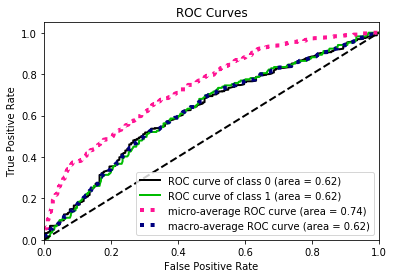

In [14]:
y_pred_prob = gnb.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_prob)
plt.show()